In [2]:
import pandas as pd
import numpy as np 

In [4]:
df = pd.read_csv(r"C:\Users\Seragg 3h\Desktop\Hol\mission 2.csv")

In [5]:
df.head(5)

,Location,Size (sqft),Bedrooms,Bathrooms,Year Built,Condition,Price
0,Suburban,1295,5,1,2007,5,61023
1,Urban,1163,1,3,1961,1,216619
2,Urban,2020,1,2,1983,5,168012
3,Suburban,1279,2,1,2004,1,206542
4,Urban,2268,1,1,1961,2,316979


In [6]:
df.isna().sum()

Location       0
Size (sqft)    0
Bedrooms       0
Bathrooms      0
Year Built     0
Condition      0
Price          0
dtype: int64

In [24]:
df.nunique()

Location         3
Size (sqft)     97
Bedrooms         5
Bathrooms        3
Year Built      52
Condition        5
Price          100
dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])
df.head(5)

,Location,Size (sqft),Bedrooms,Bathrooms,Year Built,Condition,Price
0,1,1295,5,1,2007,5,61023
1,2,1163,1,3,1961,1,216619
2,2,2020,1,2,1983,5,168012
3,1,1279,2,1,2004,1,206542
4,2,2268,1,1,1961,2,316979


In [28]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df[['Size (sqft)', 'Bedrooms', 'Bathrooms', 'Year Built', 'Condition']] = sc.fit_transform(df[['Size (sqft)', 'Bedrooms', 'Bathrooms', 'Year Built', 'Condition']])
df.head(5)

,Location,Size (sqft),Bedrooms,Bathrooms,Year Built,Condition,Price
0,1,0.242887,1.00,0.0,0.826087,1.00,61023
1,2,0.197085,0.00,1.0,0.159420,0.00,216619
2,2,0.494448,0.00,0.5,0.478261,1.00,168012
3,1,0.237335,0.25,0.0,0.782609,0.00,206542
4,2,0.580500,0.00,0.0,0.159420,0.25,316979


In [29]:
df.describe()

,Location,Size (sqft),Bedrooms,Bathrooms,Year Built,Condition,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1.020000,0.526768,0.416750,0.495000,0.506971,0.52675,282989.120000
std,0.815024,0.265985,0.337447,0.402041,0.306816,0.37698,130220.566705
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,54748.000000
25%,0.000000,0.327203,0.000000,0.000000,0.217391,0.25000,172402.000000
50%,1.000000,0.511797,0.500000,0.500000,0.478261,0.50000,309747.000000
75%,2.000000,0.743234,0.750000,1.000000,0.782609,1.00000,391003.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,498345.000000


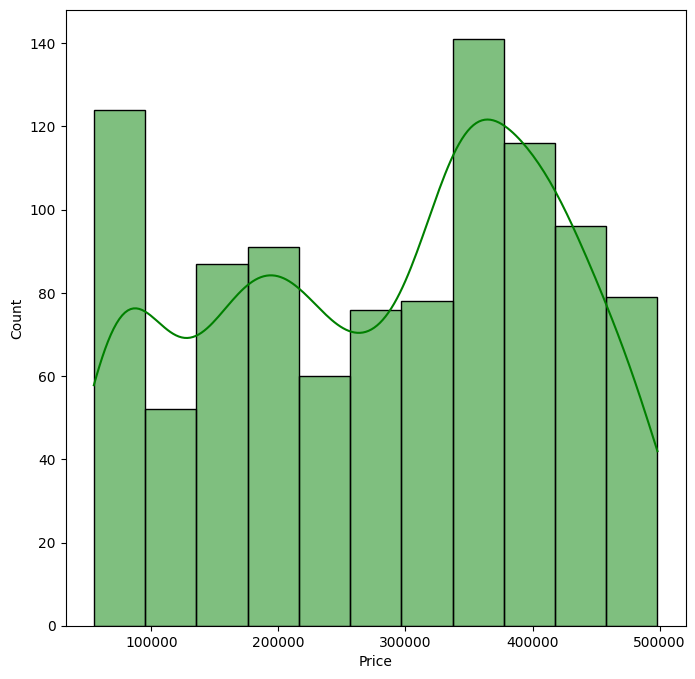

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(8 , 8))
sns.histplot(df['Price'], color='green', kde=True)
plt.title = 'Price distribution'
plt.xlabel = 'Price'
plt.ylabel = 'distribution'
plt.show()

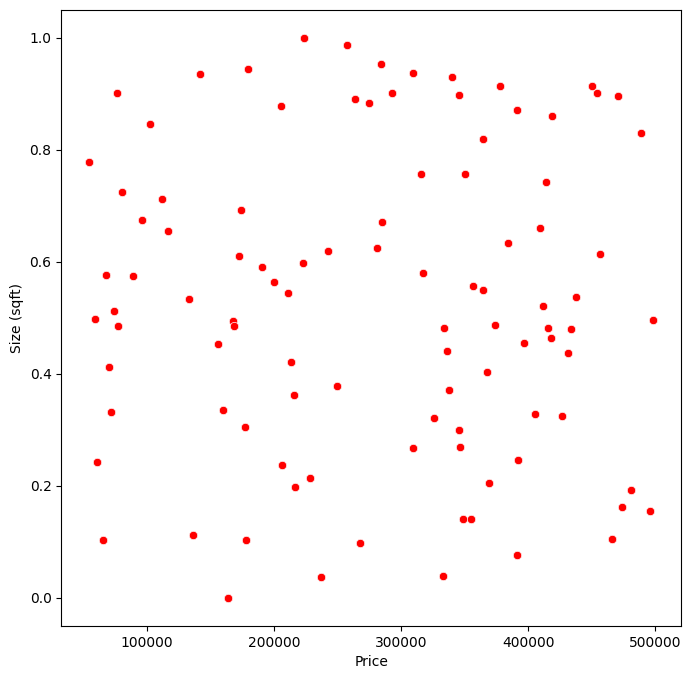

In [55]:
plt.figure(figsize=(8 , 8))
sns.scatterplot(x = df['Price'], y = df['Size (sqft)'],  color='red')
plt.title = 'relation bet size and price'
plt.show()

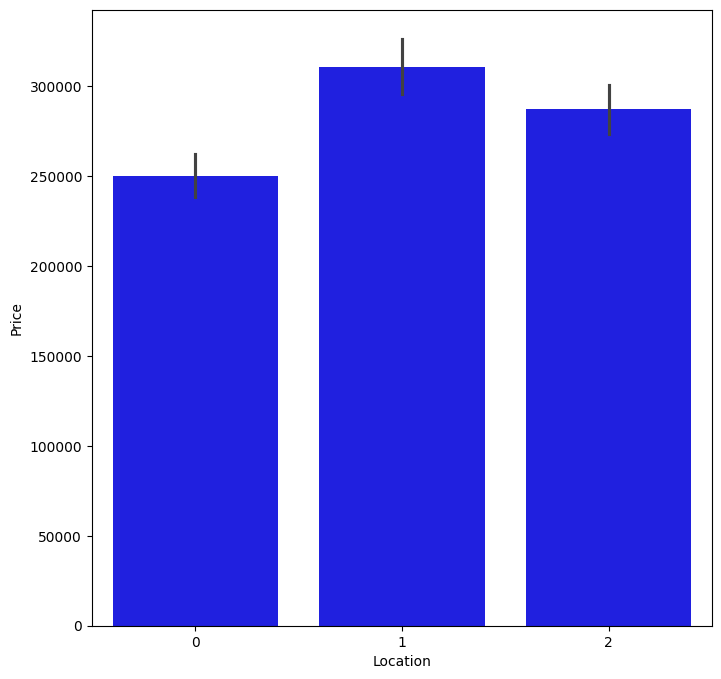

In [59]:
plt.figure(figsize=(8 , 8))
sns.barplot(x = df['Location'], y = df['Price'],  color='blue')
plt.show()

In [66]:
x = df.drop('Price' , axis=1)
y = df['Price']

In [67]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.2, random_state=42)

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [69]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

In [71]:
lr.fit(x_train , y_train)

LinearRegression()

In [72]:
dt.fit(x_train , y_train)

DecisionTreeRegressor()

In [73]:
rf.fit(x_train , y_train)

RandomForestRegressor()

In [ ]:
y_pred_lr = lr.predict(x_test)
y_pred_dt= dt.predict(x_test)
y_pred_rf = rf.predict(x_test)

In [78]:
print('MSE for lr', mean_squared_error(y_test , y_pred_lr))
print('MSE for dt', mean_squared_error(y_test , y_pred_dt))
print('MSE for rf', mean_squared_error(y_test , y_pred_rf))

MSE for lr 15770483148.400635
MSE for dt 0.0
MSE for rf 1858292.8843704932


In [79]:
print('MAE for lr', mean_absolute_error(y_test , y_pred_lr))
print('MAE for dt', mean_absolute_error(y_test , y_pred_dt))
print('MAE for rf', mean_absolute_error(y_test , y_pred_rf))

MAE for lr 109912.47385351839
MAE for dt 0.0
MAE for rf 429.55404999999934


In [95]:
print('R2_score for lr', r2_score(y_test , y_pred_lr))
print('R2_score for dt', r2_score(y_test , y_pred_dt))
print('R2_score for rf', r2_score(y_test , y_pred_rf))

R2_score for lr 0.06591055803266921
R2_score for dt 1.0
R2_score for rf 0.9998899328735182


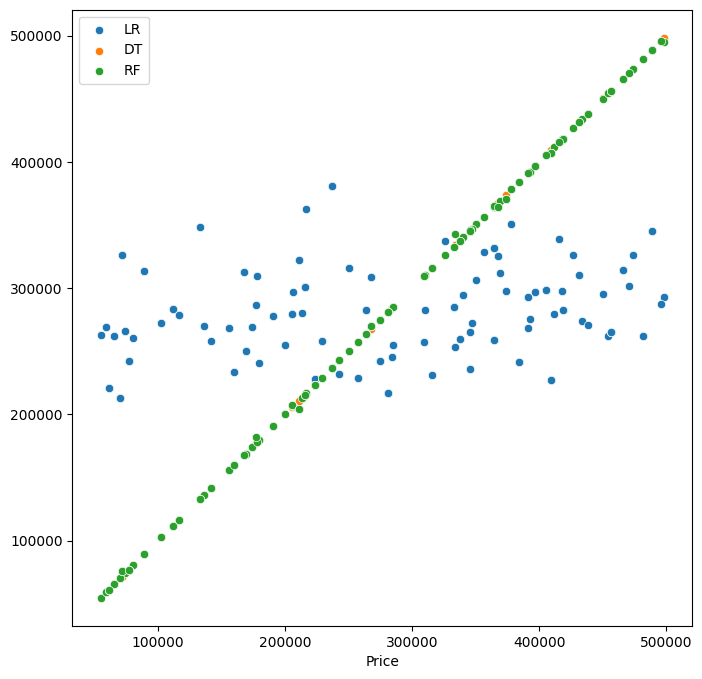

In [90]:
plt.figure(figsize=(8 , 8))
sns.scatterplot(x=y_test , y=y_pred_lr, label = 'LR')
sns.scatterplot(x=y_test , y=y_pred_dt, label = 'DT')
sns.scatterplot(x=y_test , y=y_pred_rf, label = 'RF')
plt.legend()

In [97]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV     # With DT and RF

In [98]:
grid_params = {
    'max_depth' : [5, 10, 15, 20, 25],
    'max_leaf_nodes' : [5, 10, 15, 20, 25]
}

gridsearch_model = GridSearchCV(estimator = dt, param_grid = grid_params , cv = 5)
gridsearch_model.fit(x_train, y_train)
print('Best params for dt model0', gridsearch_model.best_params_)

Best params for dt model0 {'max_depth': 10, 'max_leaf_nodes': 25}


In [103]:
y_pred_gs = gridsearch_model.best_estimator_.predict(x_test)
print('MSE for gridsearch model', mean_squared_error(y_test , y_pred_gs))
print('MAE for gridsearch model', mean_absolute_error(y_test , y_pred_gs))
print('R2 score for gridsearch model', r2_score(y_test , y_pred_gs))

MSE for gridsearch model 3073155184.8003044
MAE for gridsearch model 42654.17765836462
R2 score for gridsearch model 0.8179762925056454


In [105]:
random_params = {
    'max_depth' : [5, 10, 15, 20, 25],
    'n_estimators' : [100, 200, 300, 400, 500]
}

random_model = RandomizedSearchCV(estimator = rf, param_distributions = random_params , cv = 5)
random_model.fit(x_train, y_train)
print('Best params for dt model0', random_model.best_params_)

Best params for dt model0 {'n_estimators': 300, 'max_depth': 25}


In [106]:
y_pred_rz = random_model.best_estimator_.predict(x_test)
print('MSE for ranz model', mean_squared_error(y_test , y_pred_rz))
print('MAE for ranz model', mean_absolute_error(y_test , y_pred_rz))
print('R2 score for ranz model', r2_score(y_test , y_pred_rz))

MSE for ranz model 4098641.1865357347
MAE for ranz model 661.2807833333353
R2 score for ranz model 0.9997572365143966
